In [1]:
import os
import sys
sys.path.append('../')
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA

from sklearn.mixture import GaussianMixture

In [2]:
df = pd.read_csv("../input/features.csv")

In [3]:
df.head()

,ip,user_agent,session,num_requests,img_to_req(%),4xx(%),Head(%),std_path_length,consq_rep_path(%),ave_response_len,sum_response_len,ave_response_time,sum_response_time,session_duration,ave_time_per_page,robot_txt,is_bot
0,1.81.122.235,Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like M...,0,7,0.000000,0.0,0.0,0.000000,85.714286,108702.714286,760919,41.714286,292.0,6.900000,1.150000,0,0
1,10.92.2.8,Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG SM-...,0,28,28.571429,0.0,0.0,0.507875,71.428571,48159.571429,1348468,25.428571,712.0,0.166667,0.006173,0,0
2,100.92.35.41,Mozilla/5.0 (Linux; Android 9; SM-A205F) Apple...,0,12,0.000000,0.0,0.0,0.834847,50.000000,100601.416667,1207217,26.333333,316.0,0.216667,0.019697,0,0
3,102.0.232.185,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0,16,0.000000,0.0,0.0,0.516398,87.500000,181.625000,2906,82738.750000,1323820.0,23.100000,1.540000,0,0
4,102.0.232.220,Mozilla/5.0 (Linux; Android 11; SM-A505F) Appl...,0,14,35.714286,0.0,0.0,0.267261,57.142857,56852.428571,795934,14.571429,204.0,0.116667,0.008974,0,0


### Preprocessing

In [4]:
cols_to_scale = df.drop(["ip", "user_agent","session", "robot_txt", "is_bot"], axis=1).columns
cols_to_model = df.drop(["ip", "user_agent","session"], axis=1).columns

In [5]:
temp_quan = df.copy()
scaler_1 = QuantileTransformer(output_distribution="normal", n_quantiles=1000)
temp_quan[cols_to_scale] = scaler_1.fit_transform(temp_quan[cols_to_scale])

In [6]:
temp_quan.head()

,ip,user_agent,session,num_requests,img_to_req(%),4xx(%),Head(%),std_path_length,consq_rep_path(%),ave_response_len,sum_response_len,ave_response_time,sum_response_time,session_duration,ave_time_per_page,robot_txt,is_bot
0,1.81.122.235,Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like M...,0,-1.597698,-5.199338,-5.199338,-5.199338,-5.199338,1.304121,2.423868,0.019623,0.569095,0.283522,0.834399,1.263689,0,0
1,10.92.2.8,Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG SM-...,0,0.630254,-0.338834,-5.199338,-5.199338,0.502752,0.522099,0.508808,0.855453,0.510186,0.491193,-0.067799,-0.936644,0,0
2,100.92.35.41,Mozilla/5.0 (Linux; Android 9; SM-A205F) Apple...,0,-0.849874,-5.199338,-5.199338,-5.199338,1.948397,-1.310017,2.375697,0.794569,0.517885,0.313694,0.008782,0.176514,0,0
3,102.0.232.185,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0,0.081638,-5.199338,-5.199338,-5.199338,0.535083,1.439001,-1.664937,-1.262263,2.144828,1.950072,1.289002,1.371657,0,0
4,102.0.232.220,Mozilla/5.0 (Linux; Android 11; SM-A505F) Appl...,0,-0.443149,0.119468,-5.199338,-5.199338,-0.370902,-0.654930,1.238334,0.226501,0.238128,0.081638,-0.411534,-0.293986,0,0


### PCA (the first three components)

In [7]:
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(temp_quan[cols_to_model])

In [8]:
pca_df = pd.DataFrame(reduced_data, columns=["PCA_1", "PCA_2", "PCA_3"])

In [9]:
pca_df.head()

,PCA_1,PCA_2,PCA_3
0,5.558608,-0.661964,4.969507
1,-0.978833,-1.236321,0.082660
2,2.999172,-1.469276,-1.118131
3,5.120189,-1.873414,-1.729096
4,-0.958488,-0.131321,0.748216


In [10]:
pca.explained_variance_ratio_

array([0.32353837, 0.25529975, 0.1162171 ])

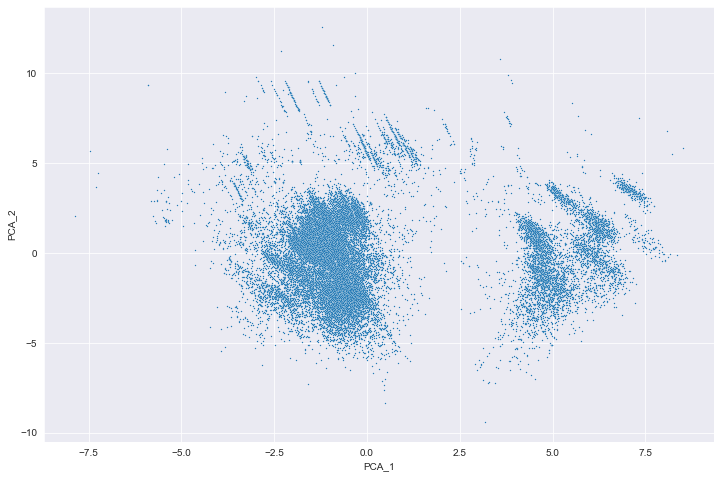

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = reduced_data[:,0], y = reduced_data[:,1],markers= "*" ,s=2)
plt.xlabel("PCA_1")
plt.ylabel("PCA_2")
plt.show()

### Splitting the data to the right and left cluster

In [12]:
right = pca_df[pca_df["PCA_1"] > 2.5].index
left = pca_df[pca_df["PCA_1"] < 2.5].index

In [13]:
right_df = temp_quan.loc[right]
left_df = temp_quan.loc[left]

In [14]:
index_r = right_df.index
index_l = left_df.index

In [15]:
right_df.shape, left_df.shape

((5325, 17), (25358, 17))

In [16]:
len(cols_to_model)

14

### Plotting the distributions of features for each cluster

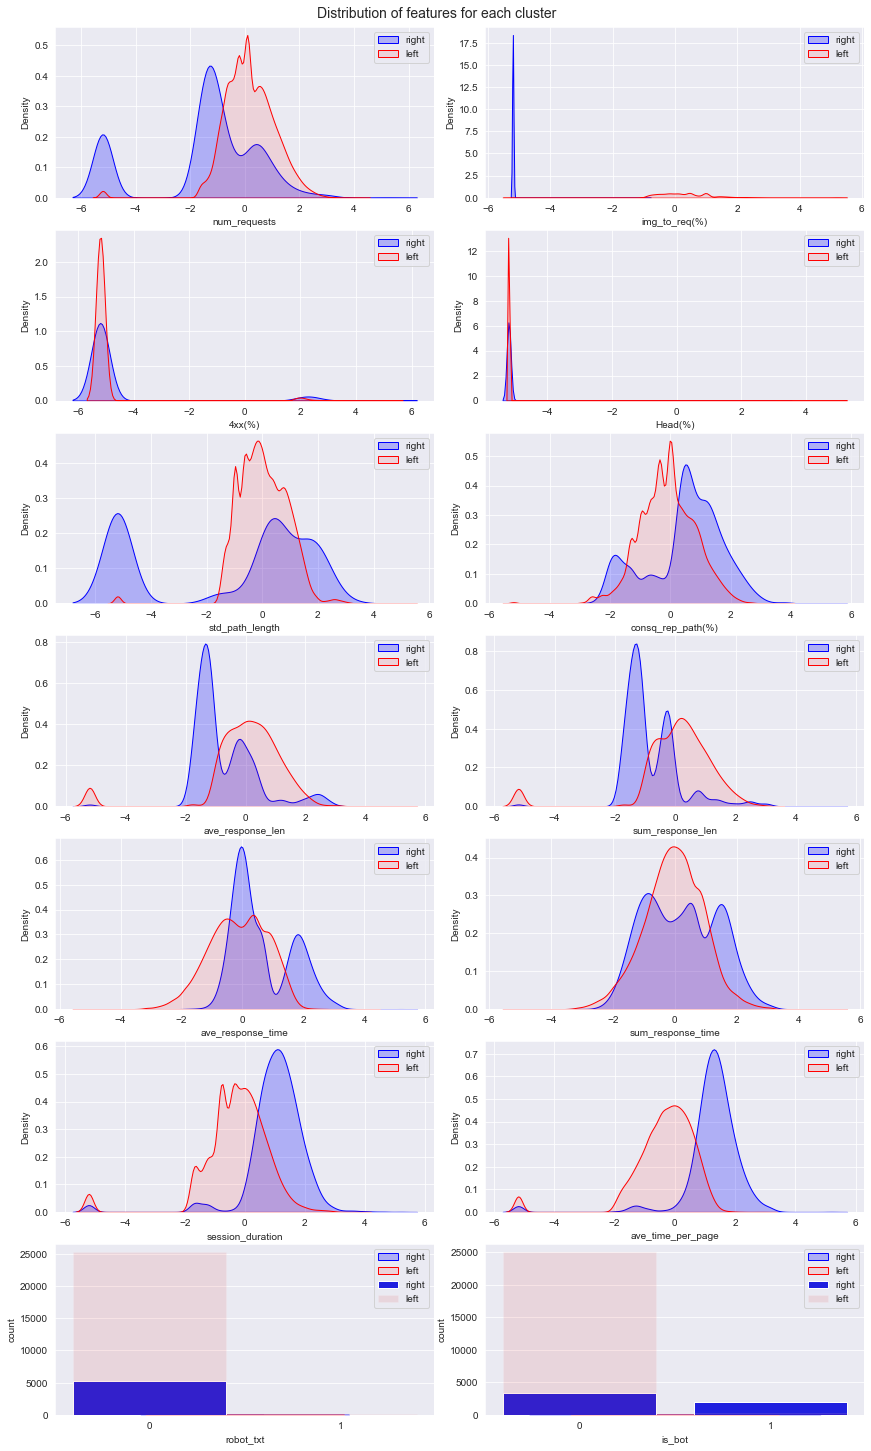

In [17]:
fig, ax = plt.subplots(7,2, figsize=(12,20))
axes = ax.ravel()
fig.suptitle("Distribution of features for each cluster", y =1, fontsize=14)
for i in range(14):
    
    if cols_to_model[i] in ["robot_txt","is_bot"]:
        sns.countplot(data = right_df, x = cols_to_model[i], color="b", label="right", fill = True, ax = axes[i])
        sns.countplot(data = left_df, x = cols_to_model[i], color="r", label="left", fill = True, alpha = 0.1,ax = axes[i])
        
    sns.kdeplot(data = right_df, x = cols_to_model[i], color="b", label="right", fill = True, ax = axes[i])
    sns.kdeplot(data = left_df, x = cols_to_model[i], color="r", label="left", fill = True, alpha = 0.1, ax = axes[i])
    
    axes[i].legend()

plt.tight_layout(pad = 0.3)
plt.show()

### Fitting Gaussian mixture models to each cluster(separately)

In [18]:
%%time
### fitting GMM models to right cluster
min_component, max_component = 1, 20

result_list = []

for n_components in range(min_component, max_component):
    for seed in range(10):
        model = GaussianMixture(n_components=n_components,
                                covariance_type = 'full',
                                random_state = seed, verbose = 0, n_init = 3)
        
        y = model.fit_predict(right_df[cols_to_model])
        bic = model.bic(right_df[cols_to_model])
        aic = model.aic(right_df[cols_to_model])
                
        result_list.append((n_components, seed, bic, aic, y, model))
        
        if not model.converged_:
            print("N_components: ", n_components, "Seed: ", seed)
        
right_cluster_results = pd.DataFrame(result_list, columns=["n_components", "seed", "bic", "aic", "y", "model"])

Wall time: 2min 1s


In [19]:
%%time
### fitting GMM models to left cluster
min_component, max_component = 1, 20

result_list = []

for n_components in range(min_component, max_component):
    for seed in range(10):
        model = GaussianMixture(n_components=n_components,
                                covariance_type = 'full',
                                random_state = seed, verbose = 0, n_init = 3)
        
        y = model.fit_predict(left_df[cols_to_model])
        bic = model.bic(left_df[cols_to_model])
        aic = model.aic(left_df[cols_to_model])
                
        result_list.append((n_components, seed, bic, aic, y, model))
        
        if not model.converged_:
            print("N_components: ", n_components, "Seed: ", seed)
        
left_cluster_results = pd.DataFrame(result_list, columns=["n_components", "seed", "bic", "aic", "y", "model"])

Wall time: 26min 17s


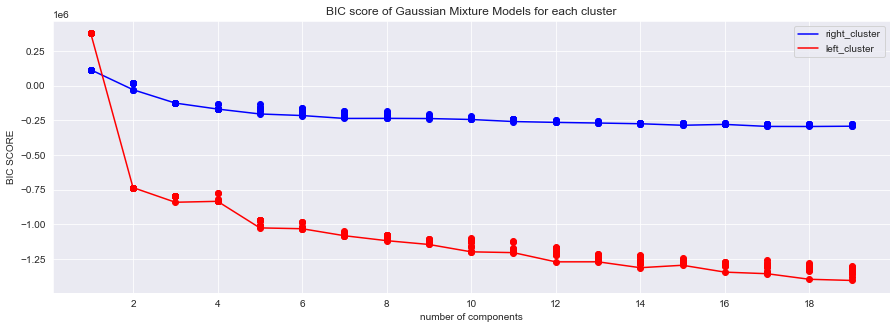

In [20]:
plt.figure(figsize=(15,5))
plt.scatter(right_cluster_results["n_components"], right_cluster_results["bic"], color="b")
m = right_cluster_results.groupby("n_components").bic.min()
plt.plot(m.index, m, color="b", label="right_cluster")

plt.scatter(left_cluster_results["n_components"], left_cluster_results["bic"], color="r")
m = left_cluster_results.groupby("n_components").bic.min()
plt.plot(m.index, m, color="r", label="left_cluster")

plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel("BIC SCORE")
plt.xlabel("number of components")
plt.legend()
plt.title("BIC score of Gaussian Mixture Models for each cluster")
plt.show()

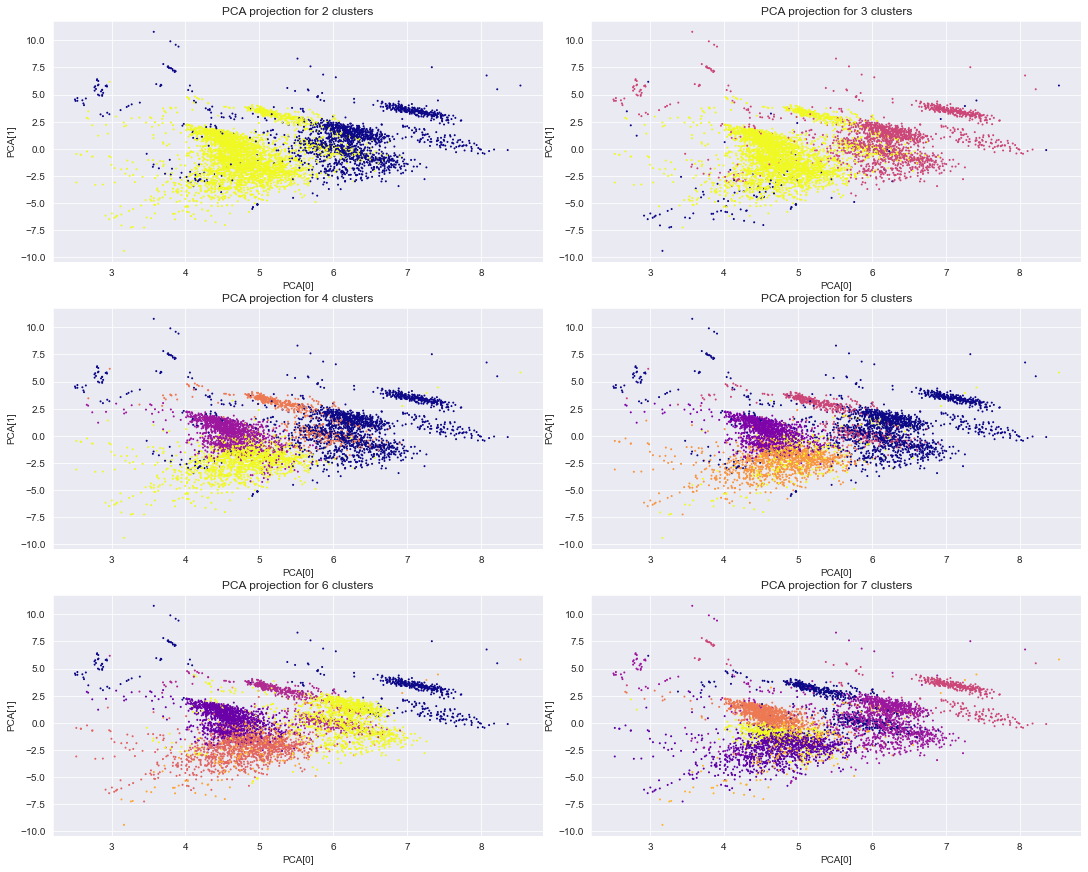

In [21]:
fig, ax = plt.subplots(3,2, figsize=(15, 12))
axs = ax.ravel()
for i in range(2, 8):
    label = right_cluster_results.set_index(["n_components", "seed"]).loc[i , 2]["y"]
    axs[i - 2].scatter(reduced_data[index_r,0], reduced_data[index_r,1], s=1, c=label, cmap='plasma')
    axs[i - 2].set_xlabel('PCA[0]')
    axs[i - 2].set_ylabel('PCA[1]')
    axs[i - 2].set_title(f'PCA projection for {i} clusters')
plt.tight_layout(pad = 0.3)
plt.show()

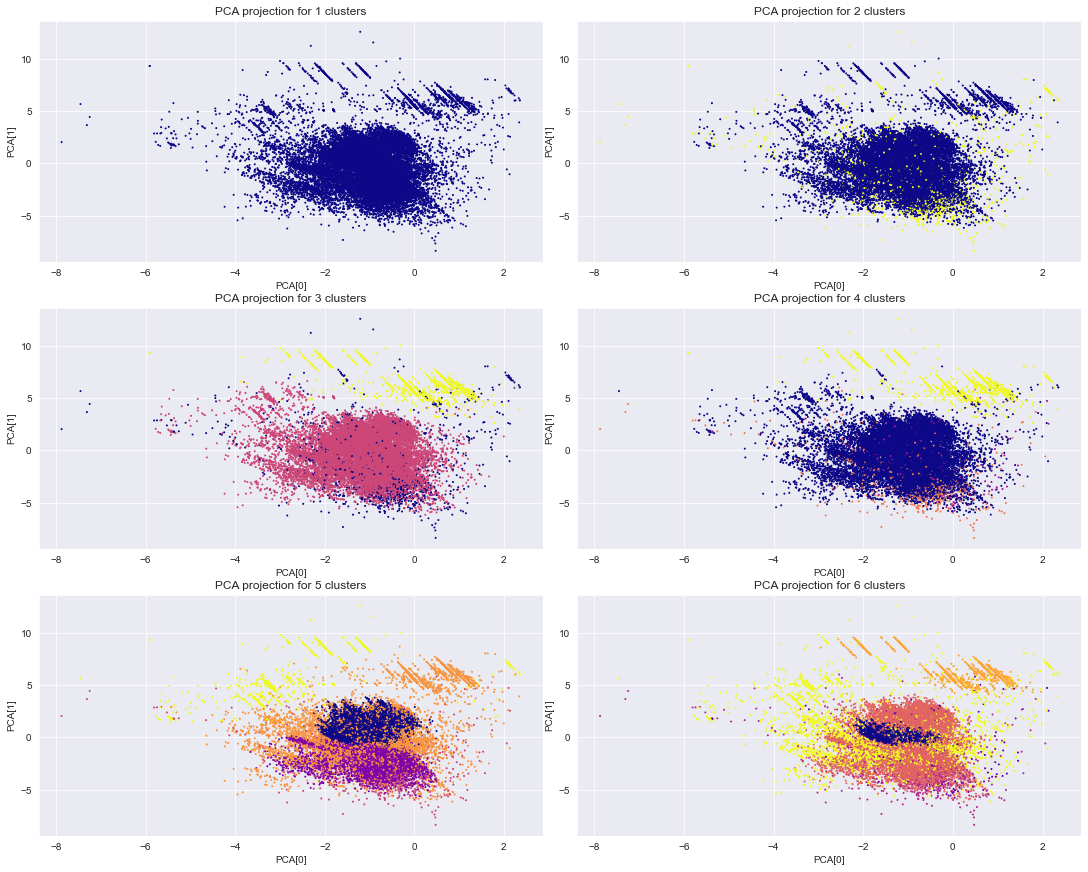

In [22]:
fig, ax = plt.subplots(3,2, figsize=(15, 12))
axs = ax.ravel()
for i in range(1, 7):
    label = left_cluster_results.set_index(["n_components", "seed"]).loc[i , 2]["y"]
    axs[i - 1].scatter(reduced_data[index_l,0], reduced_data[index_l,1], s=1, c=label, cmap='plasma')
    axs[i - 1].set_xlabel('PCA[0]')
    axs[i - 1].set_ylabel('PCA[1]')
    axs[i - 1].set_title(f'PCA projection for {i} clusters')
plt.tight_layout(pad = 0.3)
plt.show()

In [23]:
gmm_2_r  =  right_cluster_results.set_index(["n_components", "seed"]).loc[2, 2]["model"]
y_2_r = right_cluster_results.set_index(["n_components", "seed"]).loc[2, 2]["y"]
gmm_1_l  =  left_cluster_results.set_index(["n_components", "seed"]).loc[1, 2]["model"]
y_1_l = left_cluster_results.set_index(["n_components", "seed"]).loc[1, 2]["y"]

Text(0.5, 0.92, '3D projection of the left cluster')

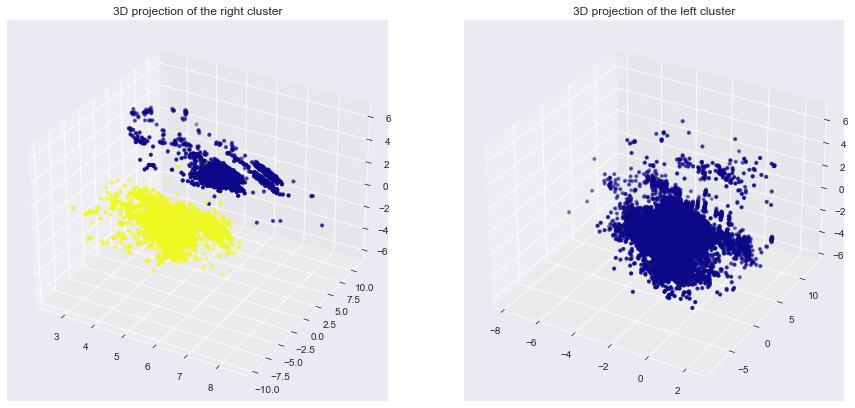

In [24]:
fig = plt.figure(figsize = (15,10))

ax = fig.add_subplot(121, projection='3d')
ax.scatter(reduced_data[index_r, 0], reduced_data[index_r, 1], reduced_data[index_r, 2],
           s= 5, linewidths = 2 , c=y_2_r,  marker= "o", cmap='plasma')
plt.title("3D projection of the right cluster")

ax = fig.add_subplot(122, projection='3d')
ax.scatter(reduced_data[index_l, 0], reduced_data[index_l, 1], reduced_data[index_l, 2],
           s= 5, linewidths = 2 , c=y_1_l, marker= "o", cmap='plasma')
plt.title("3D projection of the left cluster")

### Covariance Matrix for each cluster

Cluster 0


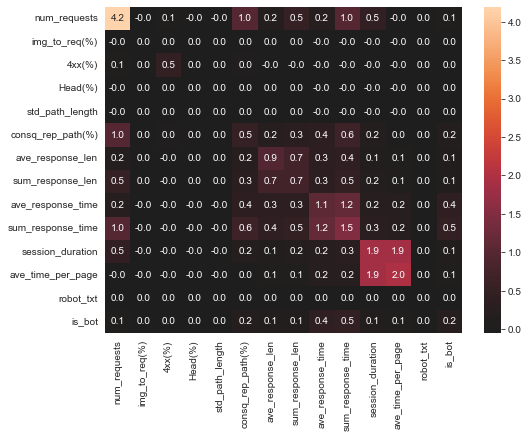

Cluster 1


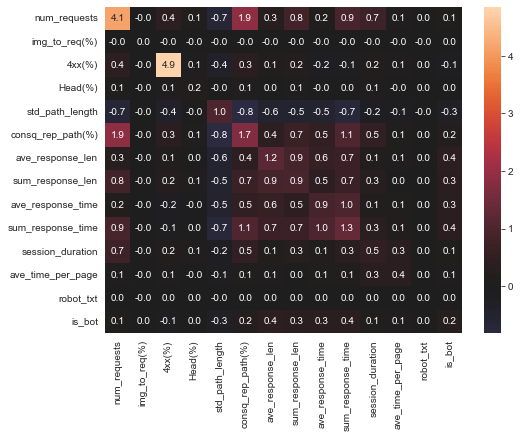

In [25]:
for i in range(len(gmm_2_r.covariances_)):
    print(f'Cluster {i}')
    plt.figure(figsize=(8, 6))
    sns.heatmap(gmm_2_r.covariances_[i], annot=True, fmt='.1f', center=0, xticklabels=cols_to_model, yticklabels=cols_to_model)
    plt.show()

Cluster 0


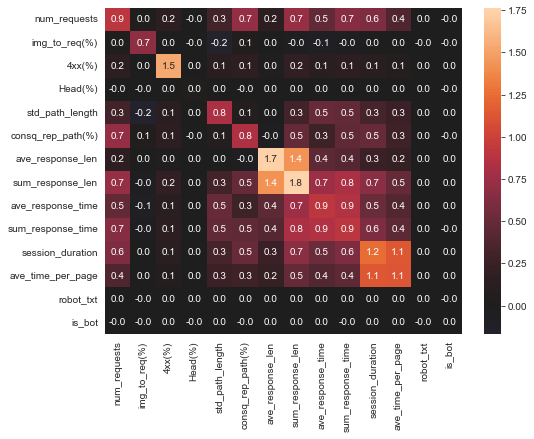

In [26]:
for i in range(len(gmm_1_l.covariances_)):
    print(f'Cluster {i}')
    plt.figure(figsize=(8, 6))
    sns.heatmap(gmm_1_l.covariances_[i], annot=True, fmt='.1f', center=0, xticklabels=cols_to_model, yticklabels=cols_to_model)
    plt.show()

### Identifying the anomalies

In [105]:
densities_l = gmm_1_l.score_samples(left_df[cols_to_model])
left_df["density"] = densities_l
density_threshold = np.percentile(densities_l, 15) 
left_df["anomaly"] = left_df["density"].apply(lambda x: 1 if x < density_threshold else 0)
left_df[left_df["anomaly"] == 1].head()

,ip,user_agent,session,num_requests,img_to_req(%),4xx(%),Head(%),std_path_length,consq_rep_path(%),ave_response_len,sum_response_len,ave_response_time,sum_response_time,session_duration,ave_time_per_page,robot_txt,is_bot,density,anomaly
9,102.105.139.132,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0,3.091742,-0.932227,1.813142,-5.199338,1.014061,2.793740,-0.348740,2.546791,2.048466,3.216732,2.563650,0.703141,0,0,-36.426294,1
11,102.105.193.47,Mozilla/5.0 (Linux; Android 10; Redmi Note 9 P...,0,-1.002056,-0.404717,-5.199338,-5.199338,0.023839,-0.833781,-5.199338,-5.199338,-2.511791,-2.542349,-0.771450,-0.154930,0,0,-12.584470,1
13,102.105.22.17,Mozilla/5.0 (Linux; Android 9; Redmi Note 8 Pr...,0,-0.443149,0.733156,-5.199338,-5.199338,-0.370902,0.208505,-5.199338,-5.199338,-1.902873,-1.649237,-0.771450,-0.616541,0,0,-11.330818,1
16,102.105.47.241,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,1,1.362078,2.225823,-5.199338,-5.199338,1.319017,0.653377,-1.011616,-0.325387,-0.633317,0.447305,0.162552,-0.656556,0,0,-13.036286,1
17,102.105.47.241,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0,-1.236652,-0.665852,2.728850,-5.199338,3.106381,-0.786745,1.862670,-0.110575,2.703808,1.897176,1.467860,1.820576,0,0,-48.966954,1


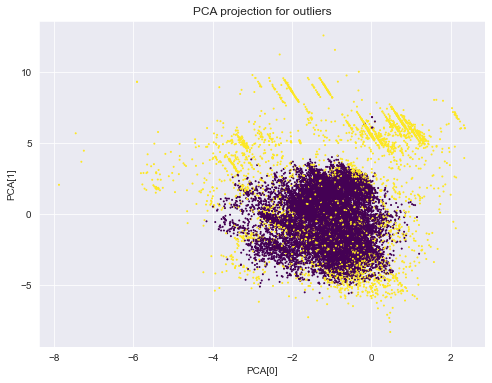

In [114]:
plt.figure(figsize=(8,6))
plt.scatter(reduced_data[index_l,0], reduced_data[index_l,1], s=1,c=left_df["anomaly"], cmap='viridis')
plt.xlabel('PCA[0]')
plt.ylabel('PCA[1]')
plt.title('PCA projection for outliers')
plt.show()

In [107]:
densities_r = gmm_2_r.score_samples(right_df[cols_to_model])
right_df["density"] = densities_r
density_threshold_r = np.percentile(densities_r, 10) 
right_df["anomaly"] = right_df["density"].apply(lambda x: 1 if x < density_threshold_r else 0)
right_df[right_df["anomaly"] == 1].head()

,ip,user_agent,session,num_requests,img_to_req(%),4xx(%),Head(%),std_path_length,consq_rep_path(%),ave_response_len,sum_response_len,ave_response_time,sum_response_time,session_duration,ave_time_per_page,robot_txt,is_bot,density,anomaly
2,100.92.35.41,Mozilla/5.0 (Linux; Android 9; SM-A205F) Apple...,0,-0.849874,-5.199338,-5.199338,-5.199338,1.948397,-1.310017,2.375697,0.794569,0.517885,0.313694,0.008782,0.176514,0,0,-22.280064,1
24,102.113.30.142,Go-http-client/1.1,0,-1.597698,-5.199338,5.199338,-5.199338,-5.199338,1.304121,-5.199338,-5.199338,-0.510631,-1.533612,0.109365,0.502515,0,1,-110.325243,1
73,102.71.195.158,MoziIIa/5.0 (X11; Linux x86_64) app_version: 581,0,-1.597698,-5.199338,-5.199338,-5.199338,2.511791,-1.705570,-1.814733,-1.824267,-0.633317,-1.649237,-1.186981,-0.066541,0,0,-13.942522,1
153,109.165.215.198,FreshpingBot/1.0 (+https://freshping.io/),0,2.836915,-5.199338,-5.199338,-5.199338,-5.199338,3.424737,1.858110,2.880791,0.558353,0.746422,3.663723,1.220153,0,1,-31.274458,1
158,109.39.88.125,FreshpingBot/1.0 (+https://freshping.io/),0,2.836069,-5.199338,-5.199338,-5.199338,-5.199338,3.424231,1.858109,2.880378,0.560013,0.748753,3.660038,1.220662,0,1,-31.120267,1


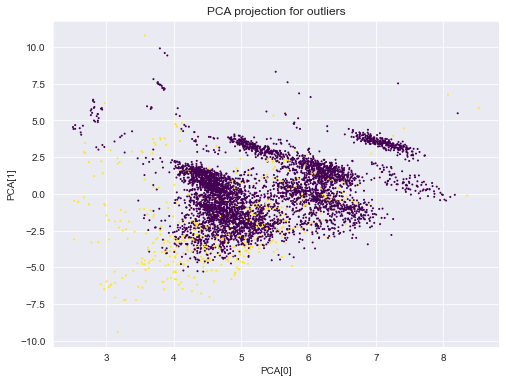

In [113]:
plt.figure(figsize=(8,6))
plt.scatter(reduced_data[index_r,0], reduced_data[index_r,1], s=1,c=right_df["anomaly"], cmap="viridis")
plt.xlabel('PCA[0]')
plt.ylabel('PCA[1]')
plt.title('PCA projection for outliers')
plt.show()